In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
import squarify
sns.set()

In [2]:
#reading the dataset
superstore = pd.read_csv('Superstore data.csv')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## EDA

In [3]:
# Get the summary statistics of the numerical data
superstore.describe() 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
# Get the summary statistics of the categorical data
superstore.describe(include = ['object'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,09/05/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [5]:
superstore.shape

(9994, 21)

In [6]:
superstore.size

209874

In [7]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# converting date to datetime datatype
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])

In [9]:
# extracting day,month and year from the date column
superstore['Order Day'] = superstore['Order Date'].dt.day
superstore['Order Month'] = superstore['Order Date'].dt.month
superstore['Order Year'] = superstore['Order Date'].dt.year

In [10]:
superstore['Ship Day'] = superstore['Ship Date'].dt.day
superstore['Ship Month'] = superstore['Ship Date'].dt.month
superstore['Ship Year'] = superstore['Ship Date'].dt.year

In [11]:
superstore['day'] = superstore['Order Date'].dt.weekday

In [12]:
# checking for missing values
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Day        0
Order Month      0
Order Year       0
Ship Day         0
Ship Month       0
Ship Year        0
day              0
dtype: int64

In [13]:
superstore.rename(columns={'Sub-Category':'Sub_Category'}, inplace = True)

##### checking the counts of some columns

In [14]:
superstore['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
superstore['Sub_Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_Category, dtype: int64

In [16]:
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [17]:
superstore['Customer Name'].nunique()

793

In [18]:
superstore['day'].value_counts()

0    1871
4    1818
6    1710
5    1655
3    1463
1    1106
2     371
Name: day, dtype: int64

In [19]:
# the mean and sum of the quantities requested by sub categories
s_sub = superstore.groupby('Sub_Category').agg([np.sum, np.mean])
s_sub[['Quantity']]

Quantity          
                  sum      mean
Sub_Category                   
Accessories      2976  3.840000
Appliances       1729  3.710300
Art              3000  3.768844
Binders          5974  3.922521
Bookcases         868  3.807018
Chairs           2356  3.818476
Copiers           234  3.441176
Envelopes         906  3.566929
Fasteners         914  4.211982
Furnishings      3563  3.723093
Labels           1400  3.846154
Machines          440  3.826087
Paper            5178  3.779562
Phones           3289  3.699663
Storage          3158  3.732861
Supplies          647  3.405263
Tables           1241  3.890282

In [20]:
#Number of items in categories requested per Region
pd.crosstab(superstore.Category,superstore.Region,margins=True)

Region,Central,East,South,West,All
Category,,,,,
Furniture,481,601,332,707,2121
Office Supplies,1422,1712,995,1897,6026
Technology,420,535,293,599,1847
All,2323,2848,1620,3203,9994


In [21]:
#Number of items in categories requested per Segment
pd.crosstab(superstore.Category,superstore.Segment,margins=True)

Segment,Consumer,Corporate,Home Office,All
Category,,,,
Furniture,1113,646,362,2121
Office Supplies,3127,1820,1079,6026
Technology,951,554,342,1847
All,5191,3020,1783,9994


In [22]:
#Frequency of quantities per categories requested and Sub_categories
pd.crosstab(superstore.Quantity,[superstore.Category,superstore.Sub_Category],margins=True)

Category     Furniture                           Office Supplies               \
Sub_Category Bookcases Chairs Furnishings Tables      Appliances  Art Binders   
Quantity                                                                        
1                   22     54          78     39              39   70     126   
2                   58    149         231     65             122  187     348   
3                   49    149         255     81             102  204     355   
4                   25     73         117     32              65   86     179   
5                   31     75         115     32              57  100     201   
6                   12     39          53     17              29   41     102   
7                   14     31          45     25              27   57      99   
8                    5     18          27      8              12   19      44   
9                    7     18          21     12               7   24      37   
10                   3      3           3      3               1    5      10   
11                   0      2           6      0               1    1       6   
12                   1      1           1      3               1    1       3   
13                   1      1           1      2               2    0       8   
14                   0      4           4      0               1    1       5   
All                228    617         957    319             466  796    1523   

Category                                                        Technology  \
Sub_Category Envelopes Fasteners Labels Paper Storage Supplies Accessories   
Quantity                                                                     
1                   25        13     34   125      90       15          66   
2                   69        44     96   340     190       65         179   
3                   67        47     76   318     206       39         196   
4                   21        29     43   168     103       19          97   
5                   28        33     40   160     105       28          92   
6                   13        16     20    81      55        6          41   
7                   17        18     22    80      44       14          47   
8                    5         5     15    37      15        2          17   
9                    9         6     10    40      24        1          22   
10                   0         0      4     7       5        1           7   
11                   0         1      1     5       4        0           3   
12                   0         2      1     1       2        0           3   
13                   0         2      1     4       1        0           2   
14                   0         1      1     4       2        0           3   
All                254       217    364  1370     846      190         775   

Category                               All  
Sub_Category Copiers Machines Phones        
Quantity                                    
1                  7        7     89   899  
2                 21       28    210  2402  
3                 10       31    224  2409  
4                 10       17    107  1191  
5                 13        9    111  1230  
6                  2        7     38   572  
7                  3        8     55   606  
8                  1        4     23   257  
9                  1        1     18   258  
10                 0        1      4    57  
11                 0        2      2    34  
12                 0        0      3    23  
13                 0        0      2    27  
14                 0        0      3    29  
All               68      115    889  9994

In [23]:
#Dropping some columns and renaming the dataframe
df = superstore.drop(['Row ID','Order ID','Customer ID','Customer Name','Country','Postal Code','Product ID','Order Date','Order Year','Order Day','Ship Date','Ship Day','Ship Month','Ship Year','day'], axis=1)
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub_Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10


## SALES

In [24]:
# Months with the highest sales in descending order
df.groupby('Order Month').Sales.sum().sort_values()

Order Month
2      59751.2514
1      94924.8356
4     137762.1286
7     147238.0970
6     152718.6793
5     155028.8117
8     159044.0630
10    200322.9847
3     205005.4888
9     307649.9457
12    325293.5035
11    352461.0710
Name: Sales, dtype: float64

In [25]:
# Months with the highest sales in descending order
df.groupby('Ship Mode').Sales.sum().sort_values()

Ship Mode
Same Day          1.283631e+05
First Class       3.514284e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: Sales, dtype: float64

In [26]:
df.groupby('Ship Mode').sum().sort_values('Sales',ascending=False)

,Sales,Quantity,Discount,Profit,Order Month
Ship Mode,,,,,
Standard Class,1.358216e+06,22797,955.02,164088.7875,46397
Second Class,4.591936e+05,7423,270.15,57446.6354,15227
First Class,3.514284e+05,5693,253.17,48969.8399,12057
Same Day,1.283631e+05,1960,82.75,15891.7589,4369


In [27]:
df.groupby('Sub_Category').sum().sort_values('Sales',ascending=False)

,Sales,Quantity,Discount,Profit,Order Month
Sub_Category,,,,,
Phones,330007.0540,3289,137.40,44515.7306,6783
Chairs,328449.1030,2356,105.00,26590.1663,4979
Storage,223843.6080,3158,63.20,21278.8264,6669
Tables,206965.5320,1241,83.35,-17725.4811,2524
Binders,203412.7330,5974,567.00,30221.7633,11860
Machines,189238.6310,440,35.20,3384.7569,897
Accessories,167380.3180,2976,60.80,41936.6357,6170
Copiers,149528.0300,234,11.00,55617.8249,534
Bookcases,114879.9963,868,48.14,-3472.5560,1745


In [28]:
df.groupby('City').sum().sort_values('Sales',ascending=False).head(5)

,Sales,Quantity,Discount,Profit,Order Month
City,,,,,
New York City,256368.161,3417,51.4,62036.9837,7390
Los Angeles,175851.341,2879,55.5,30440.7579,5780
Seattle,119540.742,1590,27.8,29156.0967,3306
San Francisco,112669.092,1935,34.0,17507.3854,4004
Philadelphia,109077.013,1981,175.5,-13837.7674,4154


### LOSS

In [29]:
# creating a dataframe called LOSS by extracting the negative values from the profit column
loss=df[df['Profit'] < 0]
loss.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub_Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,11
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,11
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,7
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,9


In [30]:
loss.shape

(1871, 13)

out of 9994 sales, there are 1871 loss which is approximately 19% of the dataset.

In [31]:
loss.describe()

,Sales,Quantity,Discount,Profit,Order Month
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,250.511574,3.762694,0.480887,-83.448042,7.788348
std,715.067296,2.141347,0.235080,284.423422,3.300477
min,0.444000,1.000000,0.100000,-6599.978000,1.000000
25%,12.503000,2.000000,0.200000,-58.660950,5.000000
50%,71.088000,3.000000,0.400000,-18.088200,9.000000
75%,284.922000,5.000000,0.700000,-6.261500,11.000000
max,22638.480000,14.000000,0.800000,-0.089500,12.000000


In [32]:
Total_loss=np.negative(loss['Profit'].sum())
Total_loss

156131.2857

In [33]:
# the segment with the highest profit gives the highest discount
loss.groupby('Segment').sum()

,Sales,Quantity,Discount,Profit,Order Month
Segment,,,,,
Consumer,247196.2460,3651,476.76,-84945.7112,7855
Corporate,131860.5383,2191,272.00,-44787.2076,4427
Home Office,89650.3705,1198,150.98,-26398.3669,2290


In [34]:
#count of loss by sub_category
loss['Sub_Category'].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub_Category, dtype: int64

In [35]:
#grouping of loss by sub_category
loss.groupby('Sub_Category').sum()

,Sales,Quantity,Discount,Profit,Order Month
Sub_Category,,,,,
Accessories,10958.8000,330,18.20,-930.6265,782
Appliances,3382.5340,235,53.60,-8629.6412,492
Binders,36140.6130,2456,452.40,-38510.4964,4706
Bookcases,48072.7408,422,37.99,-12152.2060,837
Chairs,91988.4560,876,61.40,-9880.8413,1821
Fasteners,149.2800,55,2.40,-33.1952,89
Furnishings,12845.8440,597,88.60,-6490.9134,1338
Machines,72456.2530,157,25.60,-30118.6682,370
Phones,35797.8400,476,46.60,-7530.6235,1007


In [36]:
# TOP 5 CITIES WITH THE HIGHEST LOSS
loss.groupby('City').sum().sort_values('Profit',ascending=True).head(5)

,Sales,Quantity,Discount,Profit,Order Month
City,,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411,1922
Houston,37640.7304,683,104.14,-14785.3668,1436
Chicago,19910.0120,541,88.20,-11120.6271,1184
San Antonio,17395.1450,139,17.10,-7831.0254,231
Lancaster,7699.2420,71,9.40,-7632.4946,181


In [37]:
# TOP 5 CITIES WITH THE HIGHEST SALES
df.groupby('City').sum().sort_values('Sales',ascending=False).head(5)

,Sales,Quantity,Discount,Profit,Order Month
City,,,,,
New York City,256368.161,3417,51.4,62036.9837,7390
Los Angeles,175851.341,2879,55.5,30440.7579,5780
Seattle,119540.742,1590,27.8,29156.0967,3306
San Francisco,112669.092,1935,34.0,17507.3854,4004
Philadelphia,109077.013,1981,175.5,-13837.7674,4154


In [38]:
#10 STATES with that makes the least sales
df.groupby('State').sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [39]:
loss.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Sales,Quantity,Discount,Profit,Order Month
City,,,,,
Philadelphia,70460.5510,892,115.30,-19590.7411,1922
Houston,37640.7304,683,104.14,-14785.3668,1436
Chicago,19910.0120,541,88.20,-11120.6271,1184
San Antonio,17395.1450,139,17.10,-7831.0254,231
Lancaster,7699.2420,71,9.40,-7632.4946,181
Burlington,12044.8740,19,2.00,-5999.3318,43
Dallas,9994.0562,280,39.30,-4208.5218,561
Jacksonville,31146.2710,154,18.85,-4059.9857,294
New York City,19533.8020,132,12.20,-3966.0226,319


## VISUALIZATION

#### `HISTOGRAM` visualization to know the frequency of `days of the week`.
###### where the days of the week are numbered as Sunday:0, Monday:1, Tuesday:2, Wednesday:3, Thursday: 4, Friday:5, Saturday:6

Text(0, 0.5, 'frequency')

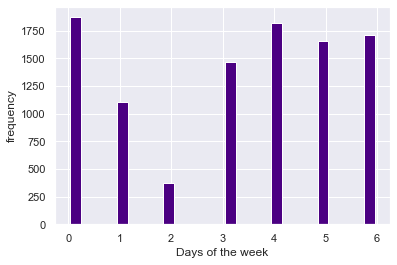

In [40]:
n,bins,pactches = plt.hist(superstore['day'], rwidth=0.7, bins = 20, color = 'indigo')
plt.xlabel('Days of the week')
plt.ylabel('frequency')

Text(0.5, 1.0, 'Ship Mode Count')

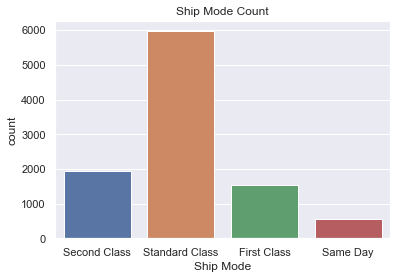

In [41]:
sns.countplot(x='Ship Mode', data=superstore).set_title('Ship Mode Count')

Text(0.5, 1.0, 'Shiping Mode Per Category')

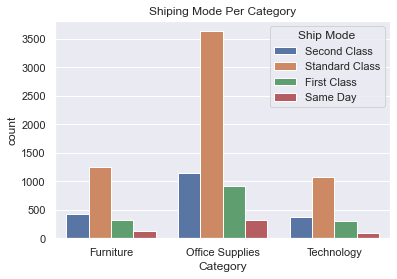

In [42]:
sns.countplot(x='Category', hue= "Ship Mode", data=superstore).set_title('Shiping Mode Per Category')

In [43]:
labels='Home Office','Corporate','Consumer'

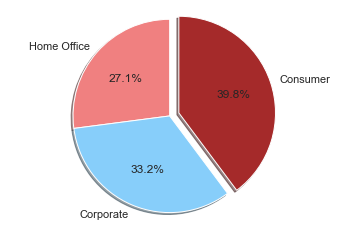

In [44]:
sizes = [400,490,588]
colors = ['lightcoral', 'lightskyblue','brown']
explode = (0,0,0.1)
plt.pie(sizes, labels=labels,explode= explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle= 90)
# plt.rcParams['figure.figsize']=(15,10)
plt.axis('equal')
plt.show()

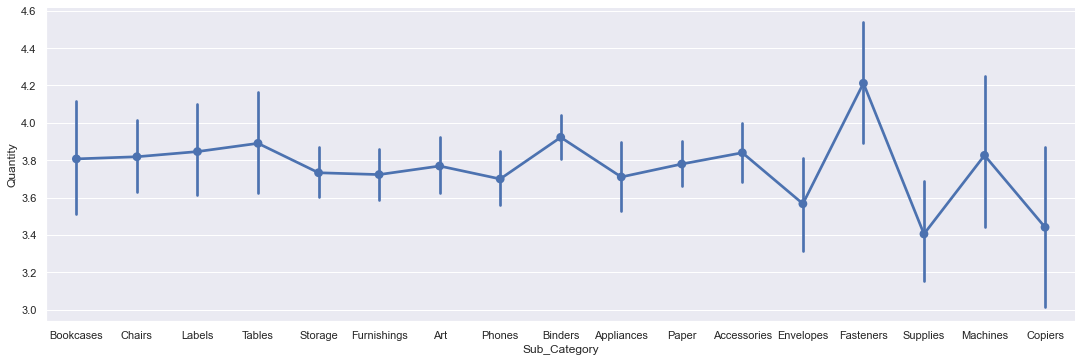

In [45]:
sns.catplot(x='Sub_Category', y='Quantity', data=superstore, kind='point', aspect=3)

Text(0.5, 1.0, 'Quantities Per Product Line')

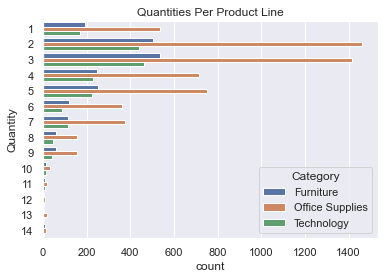

In [46]:
sns.countplot(y='Quantity', hue= "Category", data=superstore).set_title('Quantities Per Product Line')

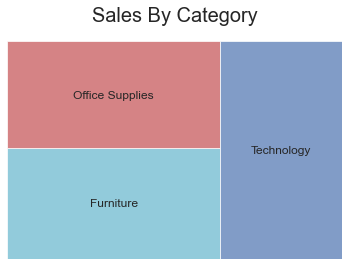

In [47]:
df_plot = df[['Category','Sales']]
df_plot = df_plot.groupby(['Category']).sum().reset_index()
plt.figure(figsize=[6,4])

squarify.plot(sizes=df_plot['Sales'], label=df_plot['Category'],
              color=['c','r','b'], alpha=0.7)
plt.title("Sales By Category", size=20, pad=20)
plt.axis('off')

plt.show()

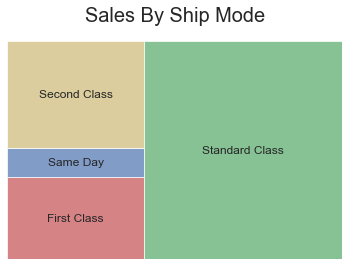

In [48]:
df_plot = superstore[['Ship Mode','Sales']]
df_plot = df_plot.groupby(['Ship Mode']).sum().reset_index()
plt.figure(figsize=[6,4])

squarify.plot(sizes=df_plot['Sales'], label=df_plot['Ship Mode'],
              color=['r','b','y','g','c',], alpha=0.7)
plt.title("Sales By Ship Mode", size=20, pad=20)
plt.axis('off')

plt.show()

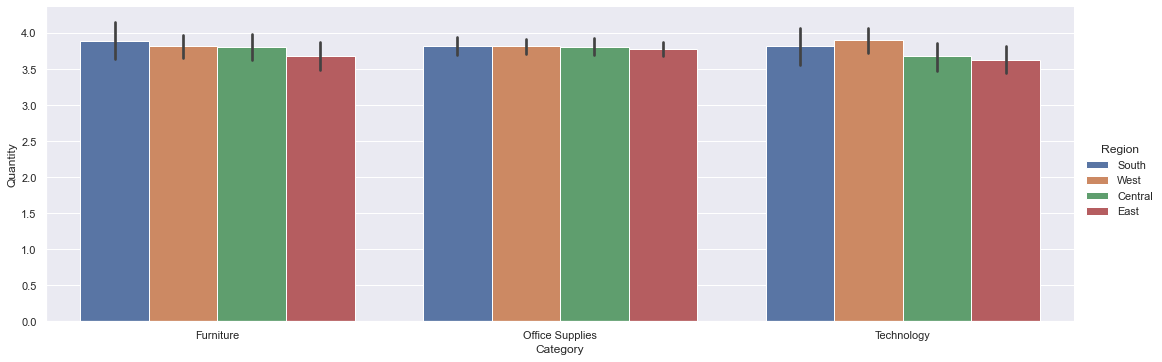

In [49]:
sns.catplot(x='Category', y='Quantity', hue='Region', data=superstore, kind='bar', aspect=3)

In [50]:
superstore[superstore['Order Month']==11]['Sales'].sum()

352461.071

In [51]:
superstore['Sales'].sum()

2297200.8603000003

In [52]:
superstore.groupby('Order Date')['Sales'].sum()

Order Date
2014-01-03      16.4480
2014-01-04     288.0600
2014-01-05      19.5360
2014-01-06    4407.1000
2014-01-07      87.1580
                ...    
2017-12-26     814.5940
2017-12-27     177.6360
2017-12-28    1657.3508
2017-12-29    2915.5340
2017-12-30     713.7900
Name: Sales, Length: 1237, dtype: float64

In [53]:
superstore.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year,day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,8,11,2016,11,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,8,11,2016,11,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,12,6,2016,16,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,11,10,2015,18,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,11,10,2015,18,10,2015,6


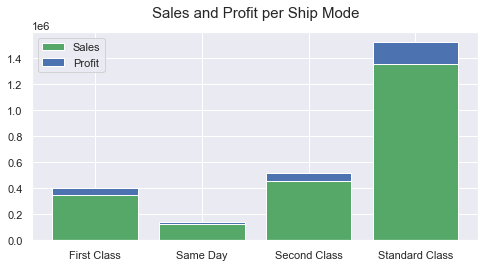

In [54]:
df_plot1 = superstore[['Ship Mode','Sales','Profit']]
df_plot1 = df_plot1.groupby(['Ship Mode']).sum().reset_index()
plt.figure(figsize=[8,13])
plt.subplot(3,1,1)
plt.bar(x=df_plot1['Ship Mode'], height=df_plot1['Sales'], color='g')
plt.bar(x=df_plot1['Ship Mode'], height=df_plot1['Profit'], bottom=df_plot1['Sales'], color='b')
plt.title("Sales and Profit per Ship Mode", size=15, pad=15)
plt.legend(['Sales','Profit'])

## REGRESSION

In [55]:
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub_Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Day',
       'Order Month', 'Order Year', 'Ship Day', 'Ship Month', 'Ship Year',
       'day'],
      dtype='object')

In [56]:
df_superstore = superstore.drop(['Row ID','Order ID','Order Date', 'Ship Date','Customer ID','Customer Name','Country','City', 'State','Postal Code','Product ID','Product Name','Ship Day','Ship Month','Ship Year','day'], axis=1)
df_superstore.head(5)

,Ship Mode,Segment,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,8,11,2016
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820,8,11,2016
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,12,6,2016
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310,11,10,2015
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11,10,2015


In [57]:
df.corr()

,Sales,Quantity,Discount,Profit,Order Month
Sales,1.000000,0.200795,-0.028190,0.479064,-0.000625
Quantity,0.200795,1.000000,0.008623,0.066253,0.023355
Discount,-0.028190,0.008623,1.000000,-0.219487,-0.004935
Profit,0.479064,0.066253,-0.219487,1.000000,-0.000502
Order Month,-0.000625,0.023355,-0.004935,-0.000502,1.000000


<AxesSubplot:>

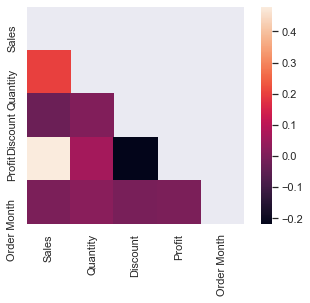

In [58]:
corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)

In [59]:
df_with_dummies = pd.get_dummies(df_superstore, drop_first=True)

In [60]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [61]:
df_with_dummies.head(5)

,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology,Sub_Category_Appliances,Sub_Category_Art,Sub_Category_Binders,Sub_Category_Bookcases,Sub_Category_Chairs,Sub_Category_Copiers,Sub_Category_Envelopes,Sub_Category_Fasteners,Sub_Category_Furnishings,Sub_Category_Labels,Sub_Category_Machines,Sub_Category_Paper,Sub_Category_Phones,Sub_Category_Storage,Sub_Category_Supplies,Sub_Category_Tables
0,261.9600,2,0.00,41.9136,8,11,2016,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,8,11,2016,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,12,6,2016,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,11,10,2015,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,11,10,2015,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [62]:
df_with_dummies.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Order Day', 'Order Month',
       'Order Year', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office',
       'Region_East', 'Region_South', 'Region_West',
       'Category_Office Supplies', 'Category_Technology',
       'Sub_Category_Appliances', 'Sub_Category_Art', 'Sub_Category_Binders',
       'Sub_Category_Bookcases', 'Sub_Category_Chairs', 'Sub_Category_Copiers',
       'Sub_Category_Envelopes', 'Sub_Category_Fasteners',
       'Sub_Category_Furnishings', 'Sub_Category_Labels',
       'Sub_Category_Machines', 'Sub_Category_Paper', 'Sub_Category_Phones',
       'Sub_Category_Storage', 'Sub_Category_Supplies', 'Sub_Category_Tables'],
      dtype='object')

### PROFIT PREDICTION

In [63]:
X  = df_with_dummies.drop('Profit', axis = 1)
y = df_with_dummies['Profit']

#### LINEAR REGRESSION MODEL

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [65]:
X_train.shape

(6995, 32)

In [66]:
X_test.shape

(2999, 32)

In [67]:
y_train.shape

(6995,)

In [68]:
y_test.shape

(2999,)

In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = lm.predict(X_test)
y_pred

array([ 47.29103764,  55.23393409,  -7.69414502, ..., 356.83839478,
        55.68902821,  44.28666559])

In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
7933,11.6800,47.291038
8657,9.7438,55.233934
9599,2.6406,-7.694145
799,17.7450,-14.426449
3813,6.4428,-24.056264
8088,12.9740,42.960290
9366,25.6800,44.787242
9403,286.3836,217.259422
4071,-52.8908,-81.373287
7583,909.9818,520.243453


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3837794755324718

In [73]:
from sklearn import metrics

In [74]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 63.2566617741844
Mean Squared Error: 45710.52123724091
Root Mean Squared Error: 213.80018998410856


#### RANDOM FOREST REGRESSOR MODEL

In [75]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [76]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [77]:
pred = regressor.predict(X_train)

In [78]:
y_predd = regressor.predict(X_test)
y_predd

array([ 10.59014,   7.37971,   3.83338, ..., 873.50599,  14.8655 ,
        17.84144])

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predd)

0.7836130491720898

In [80]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
dff.head(10)

,Actual,Predicted
7933,11.6800,10.59014
8657,9.7438,7.37971
9599,2.6406,3.83338
799,17.7450,-28.98625
3813,6.4428,6.74292
8088,12.9740,13.42438
9366,25.6800,23.14430
9403,286.3836,422.96036
4071,-52.8908,-17.88816
7583,909.9818,1020.41422


In [81]:
# combining the predicted values for linear regression model and random forest regressor model
combo = pd.concat([df, dff], axis=1)
combo.head(10)

,Actual,Predicted,Actual,Predicted
7933,11.6800,47.291038,11.6800,10.59014
8657,9.7438,55.233934,9.7438,7.37971
9599,2.6406,-7.694145,2.6406,3.83338
799,17.7450,-14.426449,17.7450,-28.98625
3813,6.4428,-24.056264,6.4428,6.74292
8088,12.9740,42.960290,12.9740,13.42438
9366,25.6800,44.787242,25.6800,23.14430
9403,286.3836,217.259422,286.3836,422.96036
4071,-52.8908,-81.373287,-52.8908,-17.88816
7583,909.9818,520.243453,909.9818,1020.41422


In [82]:
# compairing the predicted values for linear regression model and random forest regressor model
# Predicted_x is the predicted value for LINEAR REGRESSION
# Predicted_y is the predicted value for RANDOM FOREST REGRESSOR
combo = pd.merge(df, dff, how='right',on=['Actual'])
combo

,Actual,Predicted_x,Predicted_y
0,11.6800,47.291038,10.590140
1,11.6800,44.982313,10.590140
2,9.7438,55.233934,7.379710
3,2.6406,-7.694145,3.833380
4,17.7450,-14.426449,-28.986250
5,6.4428,-24.056264,6.742920
6,12.9740,42.960290,13.424380
7,25.6800,44.787242,23.144300
8,286.3836,217.259422,422.960360
9,-52.8908,-81.373287,-17.888160


## SALES PREDICTION

In [83]:
X  = df_with_dummies.drop('Sales', axis = 1)
y = df_with_dummies['Sales']

#### LINEAR REGRESSION MODEL

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = lm.predict(X_test)
y_pred

array([-69.62946136,  70.44933499,  51.49605131, ..., 845.52845776,
       156.35772352, 157.06586786])

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5361398011268939

In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 191.6600558261044
Mean Squared Error: 196246.60602446803
Root Mean Squared Error: 442.9972979877733


#### RANDOM FOREST REGRESSOR MODEL

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [91]:
predS = regressor.predict(X_train)

In [92]:
y_predS = regressor.predict(X_test)
y_predS

array([  24.828 ,   35.812 ,   24.5992, ..., 2007.716 ,   55.637 ,
         53.2504])

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predS)

0.826215444288213

In [94]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 191.6600558261044
Mean Squared Error: 196246.60602446803
Root Mean Squared Error: 442.9972979877733
